## Name: Sharique Merchant
## UNI: sm5151

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.optimize import minimize


random.seed(5151) # Change it to 5151 later.

In [ ]:
risk_free_rate=0.002
number_of_risky_assets=10
timesteps=2400
kappa=0.0125 # You also take 0.0165
delta=0.004
types=['ew','mkt','mv','u-mv','bs','min','mv-c','bs-c','min-c','r-m-1','r-m-2','dr-mv']

In [ ]:
loading_vector_B = np.random.uniform(low=0.5,
                                     high=1.5, 
                                     size=number_of_risky_assets-1)  #(N-1) X 1

In [ ]:
#Light Tailed Distribution

#Initialization

alpha=0

return_time_light=np.zeros(shape=(number_of_risky_assets,timesteps)) # N X T


#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):

  return_time_light[0,t] = np.random.normal(loc=0.007, scale=np.sqrt(0.002)) #1 X 1


  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets-1))) #(N-1)X(N-1)

  error_term= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets-1), 
                                            (sigma), 
                                           )    #(N-1) X 1

  return_time_light[1:,t] = (alpha+loading_vector_B*return_time_light[0,t]+ error_term)


In [ ]:
pd.DataFrame(return_time_light)
#First row is Factor Risky Asset and the rest 9 rows are risky asset

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.011945,-0.018762,0.052033,0.066047,-0.005761,0.017144,-0.039326,-0.033468,0.065671,-0.035807,...,0.004165,0.031401,-0.038664,0.038430,0.017726,-0.084847,0.058301,0.032937,0.026341,0.080699
1,-0.020678,-0.080633,0.007392,0.058998,0.053925,0.009163,-0.002873,-0.035184,0.045211,0.054586,...,0.012997,0.089118,-0.004147,0.053494,0.006005,-0.294046,0.069625,0.058379,0.011656,0.039214
2,0.059064,0.045422,-0.076211,0.133280,-0.049832,-0.030567,0.009964,-0.058002,-0.000916,-0.108080,...,0.036732,0.024756,-0.089777,0.024422,0.090780,-0.139286,0.178262,0.090891,-0.006782,0.101613
3,-0.107028,-0.044654,-0.020873,0.035884,0.034514,0.058921,-0.038747,0.106100,0.192365,-0.021966,...,-0.004547,0.102956,-0.020880,-0.026443,0.076359,-0.128457,0.075492,0.037607,-0.016114,0.070800
4,0.078412,0.052941,0.074479,0.078343,-0.073401,-0.048501,-0.104526,-0.093292,0.069724,-0.051276,...,-0.038207,0.090859,-0.032234,0.092469,-0.051486,-0.183213,0.139838,0.088341,-0.013434,0.106716
5,0.063795,0.033867,0.064528,0.075607,0.041931,0.035896,0.015024,-0.050653,0.087066,-0.044388,...,0.045616,0.007071,0.031930,0.114894,-0.006323,-0.071911,0.036201,-0.032560,-0.010374,0.107862
6,0.023034,-0.027913,0.019918,0.068708,0.070951,0.069666,-0.088790,-0.020486,0.036592,-0.002850,...,0.000209,0.091040,-0.048356,-0.025834,-0.005043,-0.021851,0.026430,0.025567,0.082914,0.078459
7,-0.076356,-0.025974,0.124791,0.070754,-0.107525,0.037506,-0.033717,0.013791,0.062498,-0.009390,...,-0.166193,0.034789,-0.128837,0.055206,-0.117597,-0.232869,0.142268,0.186059,0.079771,0.112525
8,0.023816,-0.033886,0.182559,0.021925,-0.039054,-0.094106,0.067312,-0.094066,0.092263,-0.027679,...,0.044833,-0.001880,-0.084082,0.129783,0.022726,-0.112453,0.035022,0.041603,-0.049090,0.000033
9,0.142224,-0.008514,-0.015386,0.010023,0.054832,0.003263,0.030050,-0.021194,-0.061418,0.070526,...,0.065874,-0.112560,-0.042622,-0.018622,0.067984,-0.146482,0.191611,-0.023988,-0.047127,0.125835


In [ ]:
return_time_light.shape

(10, 2400)

First row is Factor Risky Asset and the rest 9 rows are risky asset

In [ ]:
#Heavy Tailed Distribution

#Initialization

alpha=0
fancy_v = 5

return_time_heavy=np.zeros(shape=(number_of_risky_assets,timesteps)) # N X T


#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):
  
  return_time_heavy[0,t] = np.sqrt(0.002)*np.random.standard_t(df=5) + 0.007  #1 X 1

  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets-1))) #(N-1)X(N-1)

  error_term_esti= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets-1), 
                                            (sigma), 
                                           )    #(N-1) X 1

  error_term = np.sqrt(fancy_v/np.random.chisquare(df=fancy_v)) * error_term_esti


  return_time_heavy[1:,t] = (alpha+loading_vector_B*return_time_heavy[0,t]+ error_term)

In [ ]:
pd.DataFrame(return_time_heavy)
#First row is Factor Risky Asset and the rest 9 rows are risky asset

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.041786,0.019644,-0.021402,0.014780,0.015910,-0.042212,0.103366,-0.037560,-0.020255,-0.041662,...,-0.018416,-0.016126,0.034806,0.002108,-0.008005,0.079318,0.083466,0.047050,-0.072648,-0.025565
1,-0.005583,0.001870,-0.026145,0.083345,0.102292,-0.074449,0.155789,0.081576,-0.010635,-0.234137,...,0.011644,0.054161,0.021456,-0.094176,-0.002602,0.112981,0.125889,-0.143206,-0.091059,-0.011271
2,-0.084755,-0.014066,0.022438,0.024445,-0.033659,0.076620,0.192077,-0.120219,-0.187653,0.230097,...,-0.150250,-0.198500,0.041537,0.132222,0.042432,0.161086,0.081025,0.134083,0.087543,-0.111393
3,0.028533,-0.056438,-0.074148,-0.162831,0.067959,-0.036956,0.192188,-0.079719,-0.013413,-0.082495,...,-0.098001,-0.064345,0.029097,0.085845,0.001523,0.040626,0.064072,0.139572,-0.046319,0.037043
4,0.131845,0.078611,-0.054847,-0.012314,0.109864,-0.110251,0.411087,-0.062690,0.001935,-0.109202,...,-0.004347,-0.006518,0.053445,0.021410,-0.017364,0.097440,0.203444,0.192097,-0.096443,-0.038201
5,0.048059,0.024597,0.019780,-0.040781,-0.006734,-0.059736,0.055509,0.040436,-0.023169,-0.056712,...,0.007061,-0.021398,0.144983,-0.077133,0.065309,0.128723,0.072912,0.001397,-0.077953,-0.100214
6,0.019151,0.130565,0.056849,0.025598,0.145195,-0.014356,0.025556,-0.051555,-0.079236,-0.129650,...,-0.161567,-0.174828,0.022110,0.114228,-0.026849,0.078049,0.093734,0.019150,-0.066559,-0.090521
7,-0.024336,0.134859,0.020766,0.003022,0.031134,0.125361,0.222561,-0.131132,-0.130158,0.073652,...,-0.081890,-0.183618,0.178197,0.008720,0.051890,0.166739,-0.032253,0.044671,-0.175103,-0.014477
8,0.027367,-0.016170,-0.149759,0.029378,-0.013586,-0.018506,0.162036,0.132311,0.191858,0.183644,...,-0.041648,0.140839,0.041656,-0.016337,-0.064318,0.184971,0.074352,0.130516,-0.094933,-0.104527
9,0.066868,0.085360,0.082622,-0.104943,0.030186,-0.015642,0.139434,-0.065273,-0.130721,-0.233262,...,-0.062733,-0.016113,0.001097,0.094084,0.055184,0.002462,0.044180,-0.009742,-0.134033,-0.242281


In [ ]:
return_time_heavy.shape

(10, 2400)

Text(0.5, 1.0, 'Risky Asset | Light Tailed Distribution')

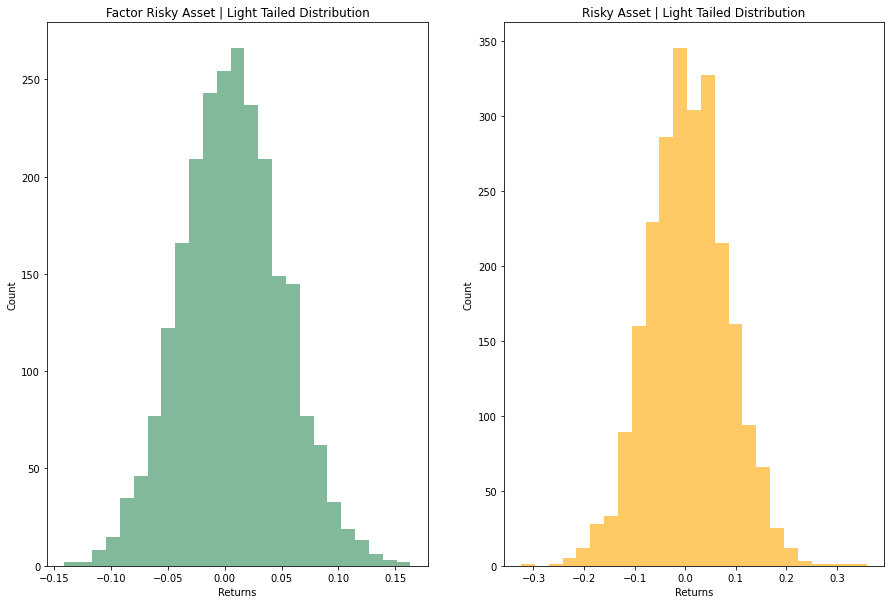

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,10))

axs[0].hist(return_time_light[0,:], bins=25, alpha=0.60,color='seagreen')
axs[1].hist(return_time_light[5,:], bins=25,alpha=0.60, color='orange')
axs[0].set(xlabel='Returns', ylabel='Count')
axs[1].set(xlabel='Returns', ylabel='Count')
axs[0].set_title("Factor Risky Asset | Light Tailed Distribution")
axs[1].set_title("Risky Asset | Light Tailed Distribution")

Text(0.5, 1.0, 'Risky Asset | Heavy Tailed Distribution')

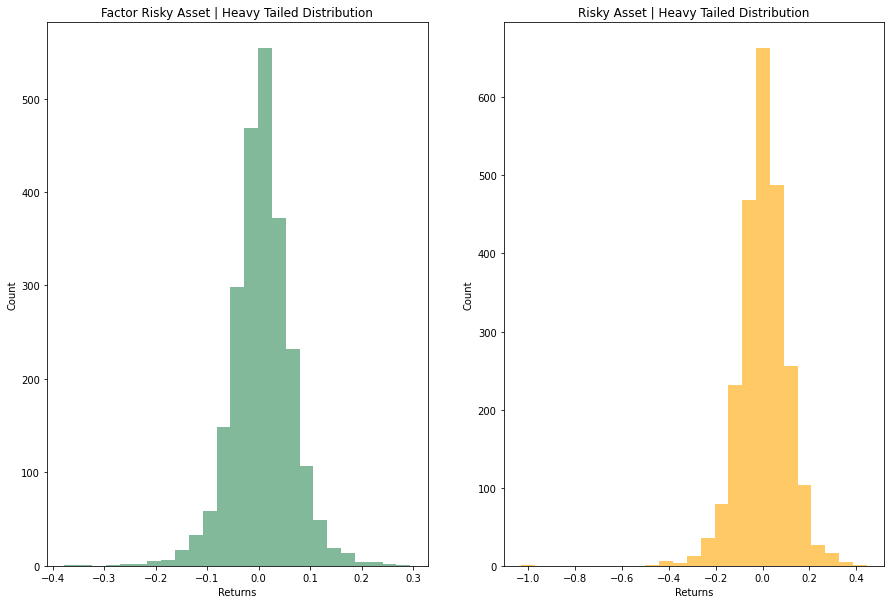

In [46]:
fig,axs=plt.subplots(1,2,figsize=(15,10))

axs[0].hist(return_time_heavy[0,:], bins=25, alpha=0.60,color='seagreen')
axs[1].hist(return_time_heavy[5,:], bins=25,alpha=0.60, color='orange')
axs[0].set(xlabel='Returns', ylabel='Count')
axs[1].set(xlabel='Returns', ylabel='Count')
axs[0].set_title("Factor Risky Asset | Heavy Tailed Distribution")
axs[1].set_title("Risky Asset | Heavy Tailed Distribution")

In [ ]:
def weightsbeforerebalancing(N,returndf,method,start,end):

  
  if start!=0 :
    #get optimal weghts one peroid prior
    prev_peroid_optimal_weights = call_optimal_weights(N,returndf,method,start-1,end-1)

   #Dump balance weight into risk free weight
    weight_risk_free = 1-np.sum(prev_peroid_optimal_weights)
    overall_return_this_peroid =np.dot(prev_peroid_optimal_weights,(1+returndf[:,start]))
    return prev_peroid_optimal_weights*(1+returndf[:,start])/(overall_return_this_peroid + weight_risk_free*(1+risk_free_rate)) 

  else:
    return call_optimal_weights(N,returndf,method,start,end)
  

In [ ]:
def call_optimal_weights(N,returndf,method,start,end) :
  

  # Defining the rolling window size from start to end
  M = end - start
  
  # Defining Equal Weighted Asset(ew)
  if method == 'ew' :
    return np.full(N, 1/N)

  # Market Asset(mkt)
  if method=='mkt':
    opt_weights= np.zeros(N)
    opt_weights[0] = 1
    return opt_weights

  # Sample-based mean variance(mv)
  if method=='mv':
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    sigma_inv= np.linalg.inv(covmatrix)
    rollingexcessmean = np.mean(rollingreturn,axis=1)
    temp= np.matmul(sigma_inv,rollingexcessmean)
    return ((kappa-risk_free_rate)/np.matmul(rollingexcessmean.T,temp))*temp

  # Sample-based unbiased mean-variance(u-mv)
  if method=='u-mv':   
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    sigma_inv= np.linalg.inv(covmatrix)
    rollingexcessmean = np.mean(rollingreturn,axis=1)
    temp= np.matmul(sigma_inv,rollingexcessmean)
    return ((kappa-risk_free_rate)/np.matmul(rollingexcessmean.T,temp))*temp*((M-N-2)/(M-1))

  # Bayes-Stein (shrink to minimum variance portfolio) (bs)
  if method == 'bs':
    rollingreturn = returndf[:,start:end]+risk_free_rate
    covmatrix=np.cov(rollingreturn)
    sigma_inv= np.linalg.inv(covmatrix)
    e = np.ones(N)
    rollingmean = np.mean(rollingreturn,axis=1)
    mu_not = e*(np.matmul(rollingmean,np.matmul(sigma_inv,e)))/(np.matmul(e.T,np.matmul(sigma_inv,e)))
    alpha = (N+2)/(N+2+(M-N-2)*(np.matmul(np.matmul(rollingmean-mu_not,sigma_inv),rollingmean-mu_not)))
    mean_js=mu_not + (1-alpha)*(rollingmean-mu_not)
    temp= np.matmul(sigma_inv,mean_js)
    return ((kappa-risk_free_rate)/np.matmul(mean_js.T,temp))*temp

  # Minimum-variance with sample based mean-variance (min)
  if method == 'min':
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    sigma_inv= np.linalg.inv(covmatrix)
    e = np.ones(N)
    temp=np.matmul(sigma_inv,e)/np.matmul(np.matmul(e.T,sigma_inv),e)
    return temp

  # Sample-based mean-variance with no-shortsale constraints (mv-c)
  if method == 'mv-c':
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    rollingmean = np.mean(rollingreturn,axis=1)
    e = np.ones(N)
    bound = tuple((None,None) for i in range(N))
    objective = lambda x : np.matmul(x.T,np.matmul(covmatrix,x))
    x = np.full(N, 1/N)
    constraint = [{'type': 'ineq', 'fun' : lambda x : risk_free_rate + np.matmul(rollingmean,x) - kappa}] # return>k
    constraint = constraint + [{'type' : 'ineq', 'fun' : lambda x: 1-np.dot(x,e)}]      #x<1
    constraint = constraint + [{'type' : 'ineq', 'fun' : lambda x:x}]                   #x>0
    solution = minimize(objective,x,method = 'SLSQP',constraints=constraint,bounds=bound)
    return solution.x

  # Bayes-Stein with no-shortsale constraints (bs-c)
  if method == 'bs-c':
    rollingreturn = returndf[:,start:end]+risk_free_rate
    covmatrix=np.cov(rollingreturn)
    sigma_inv= np.linalg.inv(covmatrix)
    e = np.ones(N)
    rollingmean = np.mean(rollingreturn,axis=1)
    mu_not = e*(np.matmul(rollingmean,np.matmul(sigma_inv,e)))/(np.matmul(e.T,np.matmul(sigma_inv,e)))
    alpha = (N+2)/(N+2+(M-N-2)*(np.matmul(np.matmul(rollingmean-mu_not,sigma_inv),rollingmean-mu_not)))
    mean_js=mu_not + (1-alpha)*(rollingmean-mu_not)
    bound = tuple((None,None) for i in range(N))
    objective = lambda x : np.matmul(x.T,np.matmul(covmatrix,x))
    x = np.full(N, 1/N)
    constraint = [{'type': 'ineq', 'fun' : lambda x : risk_free_rate + np.dot(mean_js,x) - kappa}] # return>k
    constraint = constraint + [{'type' : 'ineq', 'fun' : lambda x: 1-np.dot(x,e)}]      #x<1
    constraint = constraint + [{'type' : 'ineq', 'fun' : lambda x:x}]                   #x>0
    solution = minimize(objective, x,method = 'SLSQP',constraints=constraint,bounds=bound)
    return solution.x

  # Minimum-variance with no-shortsale constraints (min-c)
  if method == 'min-c':
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    e = np.ones(N)
    bound = tuple((None,None) for i in range(N))
    objective = lambda x : np.matmul(x.T,np.matmul(covmatrix,x))
    x = np.full(N, 1/N)
    constraint = [{'type' : 'eq', 'fun' : lambda x: 1-np.dot(x,e)}]      #x=1
    constraint = constraint + [{'type' : 'ineq', 'fun' : lambda x:x}]        #x>0
    solution = minimize(objective, x,method = 'SLSQP',constraints=constraint,bounds=bound)
    return solution.x

  # Uncertainty in mean with box uncertainty set (r-m-1)
  if method == 'r-m-1':
    rollingreturn = returndf[:,start:end] 
    covmatrix=np.cov(rollingreturn)
    rollingmean = np.mean(rollingreturn,axis=1)
    bound = tuple((None,None) for i in range(N))
    objective = lambda x : np.matmul(x.T,np.matmul(covmatrix,x))
    x = np.full(N, 1/N)
    constraint = [{'type' : 'ineq', 'fun' : lambda x :risk_free_rate + np.dot(rollingmean,x)-delta*abs(x)-kappa}]      #mu@x-del|x|>kappa
    solution = minimize(objective,x,method = 'SLSQP',constraints=constraint,bounds=bound)
    return solution.x
  
  # Uncertainty in mean with ellipsoid uncertainty set (r-m-2)
  if method == 'r-m-2':
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    cholesky_decomp_sigma = np.linalg.cholesky(covmatrix)
    rollingmean = np.mean(rollingreturn,axis=1)
    bound = tuple((None,None) for i in range(N))
    objective = lambda x : np.matmul(x.T,np.matmul(covmatrix,x))
    x = np.full(N, 1/N)
    constraint = [{'type' : 'ineq', 'fun' : lambda x:risk_free_rate+np.dot(rollingmean,x)- delta*np.linalg.norm(np.matmul(cholesky_decomp_sigma,x),2)-kappa}]      #mu@x-del|x|>kappa
    solution = minimize(objective,x,method = 'SLSQP',constraints=constraint,bounds=bound)
    return solution.x

  # Distributional robust (dr-mv)
  if method == 'dr-mv':
    rollingreturn = returndf[:,start:end]
    covmatrix=np.cov(rollingreturn)
    rollingmean = np.mean(rollingreturn,axis=1)
    bound = tuple((None,None) for i in range(N))
    objective = lambda x : np.square(np.sqrt(np.matmul(x.T,np.matmul(covmatrix,x))) + delta*np.linalg.norm(x,2))
    x = np.full(N, 1/N)
    constraint = [{'type' : 'ineq', 'fun' : lambda x:risk_free_rate+np.dot(rollingmean,x) - delta*np.linalg.norm(x,2) - kappa}]      #mu@x-del|x|>kappa
    solution = minimize(objective,x,method = 'SLSQP',constraints=constraint,bounds=bound)
    return solution.x

  if method=='mv-truedistribution':
    loading_vector_B_new = np.insert(loading_vector_B,0,1)
    expected_return = 0.007*loading_vector_B_new
    loading_vector_B_new_axis = np.asfarray(loading_vector_B_new)[:, np.newaxis].T
    sigma_mv = np.diag(np.square(np.random.uniform(0.10/np.sqrt(12),0.30/np.sqrt(12),N-1)))
    sigma_mv_modified  = np.insert(np.insert(sigma_mv,0,0,axis=0),0,0,axis=1)
    sigma_dist = 0.002*np.matmul(loading_vector_B_new_axis.T,loading_vector_B_new_axis) + sigma_mv_modified
    sigma_inv=np.linalg.inv(sigma_dist)
    oper = np.matmul(sigma_inv,expected_return)
    optimalweights = ((kappa-risk_free_rate)/(np.dot(expected_return,oper)))*oper
    return optimalweights

In [ ]:
def OutOfSampleRatio(N,returndf,method,M,T):


  mean_OSR=list()

  for t in range(M-1,T-1):
    opt_weight = call_optimal_weights(N,returndf,method,t-M+1,t+1)
    mean_OSR.append(np.dot(opt_weight,returndf[:,t+1]))

  return np.mean(mean_OSR)/np.std(mean_OSR)

In [ ]:
def InSampleRatio(N,returndf,method,M,T):


  mean_ISR=list()

  for t in range(M-1,T):
    opt_weight = call_optimal_weights(N,returndf,method,t-M+1,t+1)
    mean_ISR.append(np.dot(opt_weight,returndf[:,t]))

  return np.mean(mean_ISR)/np.std(mean_ISR)

In [ ]:
def TurnOver(N,returndf,method,M,T):


  #Counter to keep track of turnover across time
  arrears = 0

  for t in range(M-1,T) :

    arrears = arrears + np.sum(abs(call_optimal_weights(N,returndf,method,t-M+1,t+1) - weightsbeforerebalancing(N,returndf,method,t-M+1,t+1)))
    turnover=arrears/(T-M)

  return turnover

In [ ]:
def _getResults(N,returndf,M,T):

  mydict={"ISR":[],"OSR":[],"Turnover":[]}

  for i in types:
    mydict['ISR'].append(InSampleRatio(N=N,returndf=returndf,method=i,M=M,T=T))
    mydict['OSR'].append(OutOfSampleRatio(N=N,returndf=returndf,method=i,M=M,T=T))
    mydict['Turnover'].append(TurnOver(N=N,returndf=returndf,method=i,M=M,T=T))

  return pd.DataFrame(mydict,index=types)

In [ ]:
result1=_getResults(N=10,returndf=return_time_light,M=120,T=2400)
result1

,ISR,OSR,Turnover
ew,0.129738,0.130084,0.041384
mkt,0.150069,0.150239,0.000000
mv,0.324578,0.094233,0.255305
u-mv,0.324578,0.094233,0.231313
bs,0.267486,0.106220,0.346383
min,0.149502,0.136729,0.108451
mv-c,0.184680,0.123151,0.179837
bs-c,0.171944,0.116543,0.222781
min-c,0.139487,0.130794,0.149833
r-m-1,0.303831,0.087517,0.273828


In [ ]:
result1.to_excel('result1.xlsx')

In [ ]:
result2=_getResults(N=10,returndf=return_time_heavy,M=120,T=2400)
result2

,ISR,OSR,Turnover
ew,0.089495,0.089173,0.050886
mkt,0.105118,0.104832,0.000000
mv,0.303746,0.042160,0.261026
u-mv,0.303746,0.042160,0.236561
bs,0.251878,0.089918,0.385719
min,0.104505,0.090300,0.129581
mv-c,0.144265,0.070156,0.175775
bs-c,0.133945,0.057997,0.199303
min-c,0.102349,0.095656,0.096153
r-m-1,0.287171,0.037831,0.283721


In [ ]:
result2.to_excel('result2.xlsx')

Question 2.2

Mean Variance for True Distribution

In [ ]:
InSampleRatio(N=10,returndf=return_time_light,method='mv-truedistribution',M=120,T=2400)

0.15006916247039506

In [ ]:
OutOfSampleRatio(N=10,returndf=return_time_light,method='mv-truedistribution',M=120,T=2400)

0.15023886773056128

In [ ]:
TurnOver(N=10,returndf=return_time_light,method='mv-truedistribution',M=120,T=2400)

0.026393626428313194

In [ ]:
InSampleRatio(N=10,returndf=return_time_heavy,method='mv-truedistribution',M=120,T=2400)

0.10511784014383459

In [ ]:
OutOfSampleRatio(N=10,returndf=return_time_heavy,method='mv-truedistribution',M=120,T=2400)

0.10483195671269742

In [ ]:
TurnOver(N=10,returndf=return_time_heavy,method='mv-truedistribution',M=120,T=2400)

0.03260832542015525

## 3| Tuning-parameter Ablation Study

### 3.1 | The Effect of Window Length

In [ ]:
result3=_getResults(N=10,returndf=return_time_light,M=500,T=2400)
result3

,ISR,OSR,Turnover
ew,0.131475,0.132015,0.041430
mkt,0.152986,0.153344,0.000000
mv,0.211663,0.134518,0.174237
u-mv,0.211663,0.134518,0.169704
bs,0.197939,0.156590,0.124736
min,0.153668,0.150550,0.065998
mv-c,0.135330,0.114586,0.107077
bs-c,0.137547,0.116834,0.147627
min-c,0.145181,0.142991,0.096225
r-m-1,0.184845,0.117873,0.205051


In [ ]:
result3.to_excel('result3.xlsx')

In [ ]:
result4=_getResults(N=10,returndf=return_time_heavy,M=500,T=2400)
result4

,ISR,OSR,Turnover
ew,0.078726,0.078260,0.050728
mkt,0.089275,0.088709,0.000000
mv,0.149305,0.046939,0.218057
u-mv,0.149305,0.046939,0.212672
bs,0.124270,0.076770,0.174087
min,0.080963,0.075256,0.079149
mv-c,0.099999,0.031824,0.157931
bs-c,0.094543,0.028028,0.142789
min-c,0.088229,0.083832,0.033738
r-m-1,0.136948,0.050550,0.234098


In [32]:
result4.to_excel('result4.xlsx')

### 3.2 | The Effect of Asset Number

In [33]:
number_of_risky_assets_Q3=50
loading_vector_B = np.random.uniform(low=0.5,
                                     high=1.5, 
                                     size=number_of_risky_assets_Q3-1)  #(N-1) X 1


In [34]:
#Light Tailed Distribution

#Initialization

alpha=0

return_time_light_Q3=np.zeros(shape=(number_of_risky_assets_Q3,timesteps)) # N X T


#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):

  return_time_light_Q3[0,t] = np.random.normal(loc=0.007, scale=np.sqrt(0.002)) #1 X 1


  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets_Q3-1))) #(N-1)X(N-1)

  error_term= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets_Q3-1), 
                                            (sigma), 
                                           )    #(N-1) X 1

  return_time_light_Q3[1:,t] = (alpha+loading_vector_B*return_time_light_Q3[0,t]+ error_term)


In [35]:
#Heavy Tailed Distribution

#Initialization

alpha=0
fancy_v = 5

return_time_heavy_Q3=np.zeros(shape=(number_of_risky_assets_Q3,timesteps)) # N X T


#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):
  
  return_time_heavy_Q3[0,t] = np.sqrt(0.002)*np.random.standard_t(df=5) + 0.007  #1 X 1

  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets_Q3-1))) #(N-1)X(N-1)

  error_term_esti= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets_Q3-1), 
                                            (sigma), 
                                           )    #(N-1) X 1

  error_term = np.sqrt(fancy_v/np.random.chisquare(df=fancy_v)) * error_term_esti


  return_time_heavy_Q3[1:,t] = (alpha+loading_vector_B*return_time_heavy_Q3[0,t]+ error_term)

In [36]:
result5=_getResults(N=50,returndf=return_time_light_Q3,M=120,T=2400)
result5

,ISR,OSR,Turnover
ew,0.143065,0.143059,0.046224
mkt,0.140020,0.140066,0.000000
mv,0.813836,-0.028842,0.394494
u-mv,0.813836,-0.028842,0.225758
bs,0.709015,-0.004027,0.698950
min,0.129808,0.073668,0.383703
mv-c,0.304727,0.103429,0.194029
bs-c,0.243782,0.065349,0.367184
min-c,0.160341,0.143082,0.100464
r-m-1,0.726489,0.010393,0.288228


In [37]:
result5.to_excel('result5.xlsx')

In [38]:
result6=_getResults(N=50,returndf=return_time_heavy_Q3,M=120,T=2400)
result6

,ISR,OSR,Turnover
ew,0.119936,0.119971,0.056323
mkt,0.122110,0.122201,0.000000
mv,0.872251,0.039171,0.348463
u-mv,0.872251,0.039171,0.199456
bs,0.802830,0.044680,0.687740
min,0.036495,0.008122,0.453227
mv-c,0.244182,0.069053,0.170558
bs-c,0.237675,0.087800,0.261182
min-c,0.101777,0.087626,0.103039
r-m-1,0.781763,0.056776,0.258198


In [39]:
result6.to_excel('result6.xlsx')

# 3.3 | The Effect of α

In [40]:
number_of_risky_assets=10
loading_vector_B = np.random.uniform(low=0.5,
                                     high=1.5, 
                                     size=number_of_risky_assets-1)  #(N-1) X 1`

In [41]:
#Light Tailed Distribution with Alpha

#Initialization


alpha=np.random.uniform(-0.01,0.01,number_of_risky_assets-1)

return_time_light_alp=np.zeros(shape=(number_of_risky_assets,timesteps)) # N X T


#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):

  return_time_light_alp[0,t] = np.random.normal(loc=0.007, scale=np.sqrt(0.002)) #1 X 1


  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets-1))) #(N-1)X(N-1)

  error_term= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets-1), 
                                            (sigma), 
                                           )    #(N-1) X 1

  return_time_light_alp[1:,t] = (alpha+loading_vector_B*return_time_light_alp[0,t]+ error_term)


In [42]:
return_time_light_alp

array([[-0.0264563 , -0.00803363, -0.0143902 , ..., -0.01476737,
         0.04639263,  0.03019879],
       [-0.07026654,  0.11801173,  0.03139242, ..., -0.05046142,
         0.02784883, -0.09731908],
       [-0.08791678, -0.00358555,  0.04941123, ...,  0.05182536,
         0.00598525,  0.05356867],
       ...,
       [-0.11091697, -0.01199848, -0.05965079, ...,  0.0107306 ,
         0.03694044,  0.03015032],
       [ 0.0386254 ,  0.03673962,  0.03754542, ...,  0.00905271,
         0.0396748 ,  0.04214395],
       [-0.06854368,  0.00984968,  0.03529638, ...,  0.00302025,
         0.10540686, -0.00478703]])

In [43]:
#Heavy Tailed Distribution

#Initialization
alpha=np.random.uniform(-0.01,0.01,number_of_risky_assets-1)
fancy_v = 5

return_time_heavy_alp=np.zeros(shape=(number_of_risky_assets,timesteps)) # N X T


#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):
  
  return_time_heavy_alp[0,t] = np.sqrt(0.002)*np.random.standard_t(df=5) + 0.007  #1 X 1

  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets-1))) #(N-1)X(N-1)

  error_term_esti= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets-1), 
                                            (sigma), 
                                           )    #(N-1) X 1

  error_term = np.sqrt(fancy_v/np.random.chisquare(df=fancy_v)) * error_term_esti


  return_time_heavy_alp[1:,t] = (alpha+loading_vector_B*return_time_heavy_alp[0,t]+ error_term)

In [44]:
return_time_heavy_alp

array([[ 0.02405194,  0.08606233, -0.04659708, ...,  0.00932651,
        -0.01454198, -0.02010926],
       [ 0.08345353,  0.11742938, -0.04992625, ...,  0.11184235,
         0.07813882, -0.01255707],
       [-0.01130138,  0.03985583,  0.02259857, ..., -0.01846147,
        -0.01573974,  0.05088851],
       ...,
       [ 0.1446346 ,  0.09748054, -0.02908721, ..., -0.08272533,
        -0.03781595, -0.1039968 ],
       [-0.01904294,  0.04573926, -0.07893353, ..., -0.14383738,
         0.0577042 , -0.01525375],
       [ 0.07537064,  0.06171685,  0.0050377 , ...,  0.04190426,
        -0.2695841 ,  0.03242693]])

In [47]:
result7=_getResults(N=10,returndf=return_time_light_alp,M=120,T=2400)
result7

,ISR,OSR,Turnover
ew,0.163329,0.164780,0.041270
mkt,0.172342,0.173479,0.000000
mv,0.371344,0.162888,0.190600
u-mv,0.371344,0.162888,0.172885
bs,0.323770,0.167702,0.250100
min,0.119299,0.112709,0.104305
mv-c,0.238818,0.167974,0.151572
bs-c,0.227598,0.160231,0.210593
min-c,0.144790,0.141088,0.084375
r-m-1,0.352986,0.175064,0.191962


In [48]:
result7.to_excel('result7.xlsx')

In [49]:
result8=_getResults(N=10,returndf=return_time_heavy_alp,M=120,T=2400)
result8

,ISR,OSR,Turnover
ew,0.101126,0.101429,0.050300
mkt,0.130123,0.130554,0.000000
mv,0.360067,0.124859,0.189260
u-mv,0.360067,0.124859,0.171533
bs,0.303374,0.116157,0.342231
min,0.100640,0.089387,0.127146
mv-c,0.175663,0.083941,0.160226
bs-c,0.173891,0.087709,0.198950
min-c,0.079964,0.072717,0.101584
r-m-1,0.335548,0.119127,0.203257


In [50]:
result8.to_excel('result8.xlsx')

# 4| Study on Intertemporal Correlation

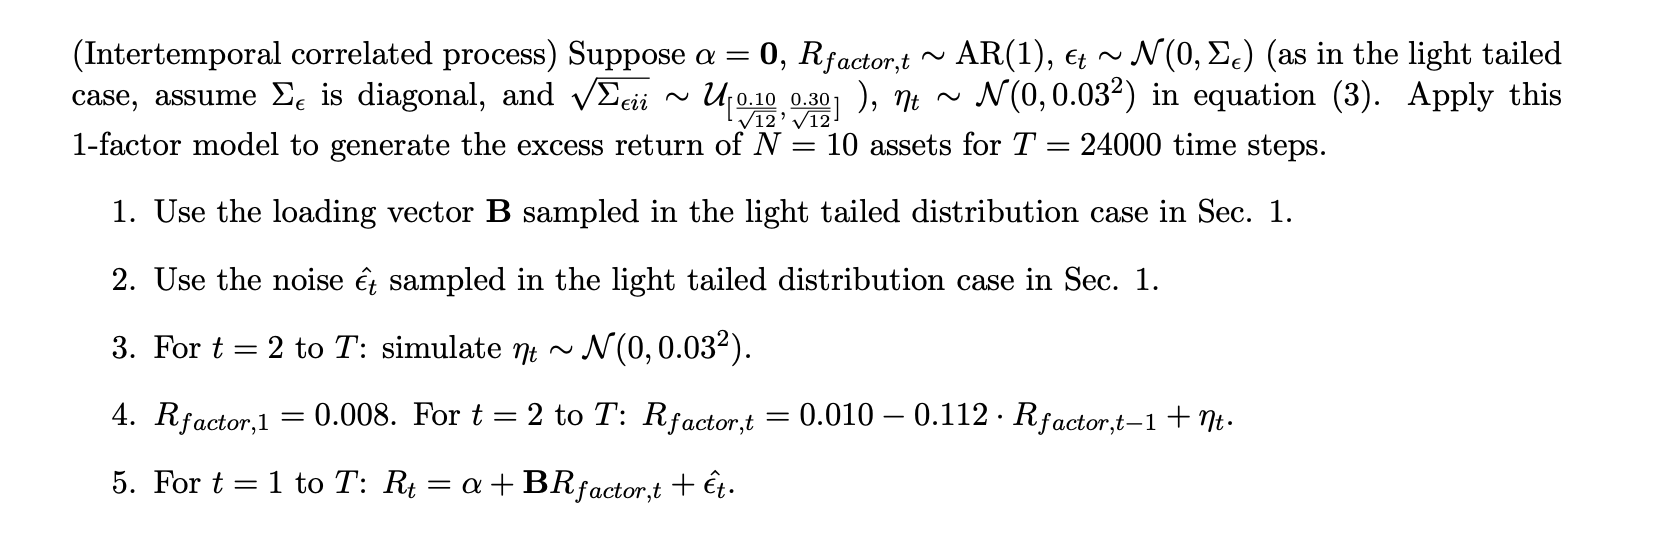

In [51]:
number_of_risky_assets_Q4=10
loading_vector_B = np.random.uniform(low=0.5,
                                     high=1.5, 
                                     size=number_of_risky_assets_Q4-1)  #(N-1) X 1
timesteps=2400

In [52]:
#Light Tailed Distribution

#Initialization

alpha=0

return_time_light_AR1=np.zeros(shape=(number_of_risky_assets_Q4,timesteps)) # N X T

return_time_light_AR1[0,0]=0.008

for t in range(timesteps-1):
  return_time_light_AR1[0,t+1]=0.01-0.112*return_time_light_AR1[0,t]+np.random.normal(0,0.03)
  

#Simulating return of all N-1 risky assets for all timesteps
for t in range(timesteps):

  sigma = np.diag(np.square(np.random.uniform(low=0.1/np.sqrt(12),high=0.3/np.sqrt(12),size=number_of_risky_assets_Q4-1))) #(N-1)X(N-1)

  error_term= np.random.multivariate_normal(
                                            np.zeros(number_of_risky_assets_Q4-1), 
                                            (sigma), 
                                           )    #(N-1) X 1
  
  return_time_light_AR1[1:,t] = (alpha+loading_vector_B*return_time_light_AR1[0,t]+ error_term)


In [53]:
return_time_light_AR1.shape

(10, 2400)

In [54]:
result9=_getResults(N=10,returndf=return_time_light_AR1,M=120,T=2400)
result9

,ISR,OSR,Turnover
ew,0.255299,0.255317,0.040756
mkt,0.286477,0.286366,0.000000
mv,0.391722,0.201941,0.166424
u-mv,0.391722,0.201941,0.151045
bs,0.346977,0.254694,0.117221
min,0.304991,0.282136,0.065229
mv-c,0.313576,0.205434,0.177281
bs-c,0.295406,0.198570,0.216012
min-c,0.268851,0.257009,0.099843
r-m-1,0.353972,0.187461,0.178673


In [55]:
result9.to_excel('result9.xlsx')